NAME : ASJID ALI

TASK 2 - Prediction using Unsupervised ML

GRIP @ SPARKS FOUNDATION

Dataset: https://bit.ly/3kXTdox

Importing libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading data from the source

In [123]:
data=pd.read_csv('iris.csv')
print("Data imported successfully")

Data imported successfully


In [104]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [106]:
data.shape

(150, 6)

In [107]:
data1=data.iloc[:,1:]
data1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


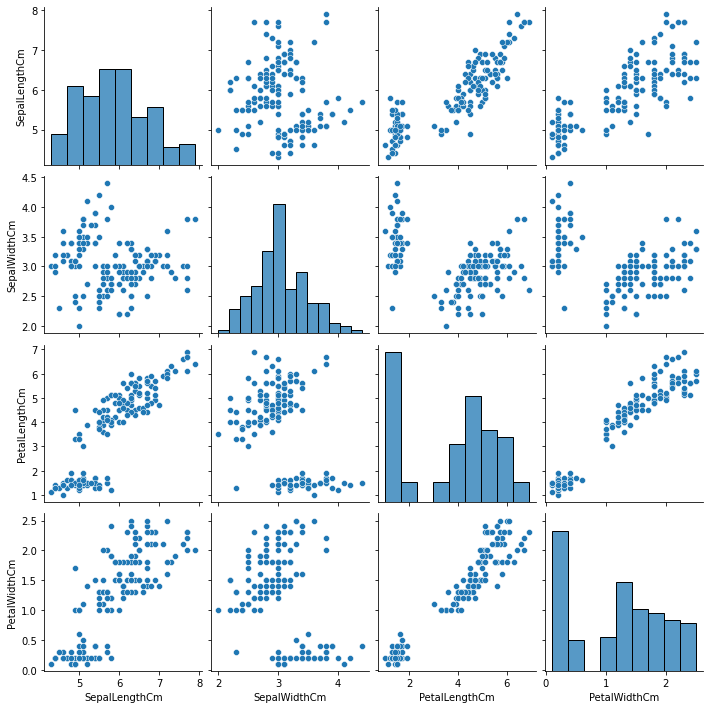

In [108]:
import seaborn as sns
sns.pairplot(data1)
plt.show()

BY HIERACHICAL CLUSTERING

In [109]:
def norm(i):
    x=(i-i.mean())/(i.std())
    return x
df=norm(data.iloc[:,1:5])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593
...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121
146,0.551486,-1.277692,0.703536,0.918985
147,0.793012,-0.124540,0.816888,1.050019
148,0.430722,0.797981,0.930239,1.443121


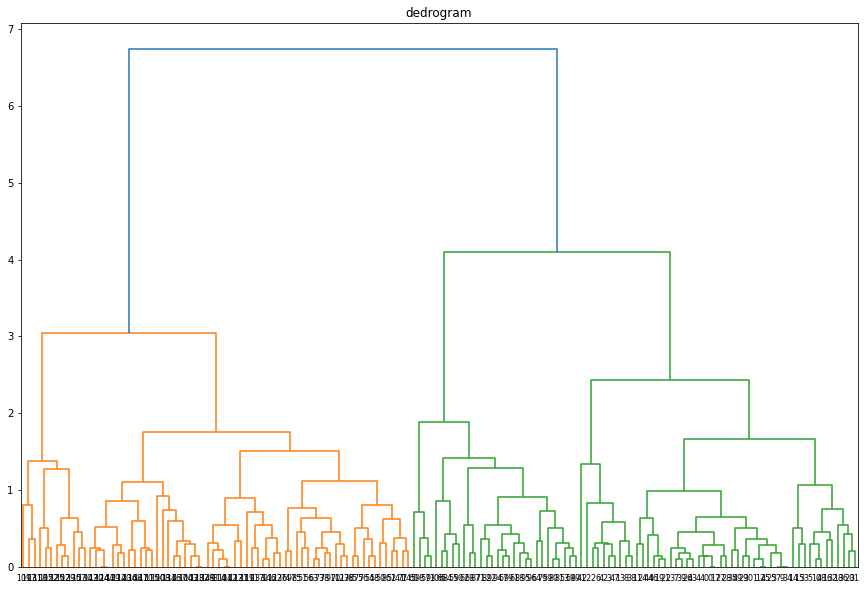

In [110]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
data2=data.iloc[:,1:4]
z=linkage(data2,method='complete')
plt.figure(figsize=(15,10))
plt.title('dedrogram')
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=8)
plt.show()

In [111]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=3,linkage='complete').fit(df)


In [112]:
agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [122]:
cluster=pd.Series(agg.labels_)
data['cluster']=cluster
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
140,141,6.7,3.1,5.6,2.4,Iris-virginica,0
141,142,6.9,3.1,5.1,2.3,Iris-virginica,0
142,143,5.8,2.7,5.1,1.9,Iris-virginica,0
143,144,6.8,3.2,5.9,2.3,Iris-virginica,0
144,145,6.7,3.3,5.7,2.5,Iris-virginica,0
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0
149,150,5.9,3.0,5.1,1.8,Iris-virginica,0


In [118]:
data5=data.iloc[:,[6,1,2,3,4,5]]
data5.groupby(data5.cluster).mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
cluster,,,,
0,6.472727,2.990909,5.183117,1.815584
1,5.016327,3.440816,1.467347,0.242857
2,5.512500,2.466667,3.866667,1.170833


#Iris-virginica(cluster=0)
#iris-setosa(cluster=1)
#Iris-versicolour(cluster=2)

BY KMEANS

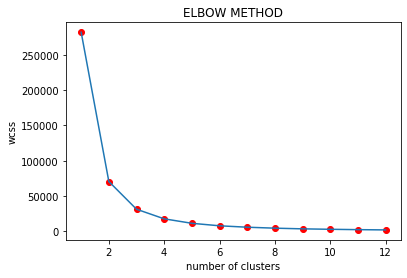

In [115]:
from sklearn.cluster import KMeans
data3=data.iloc[:,:4].values
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=12,random_state=1)
    kmeans.fit(data3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.scatter(range(1, 13), wcss,color='Red')
plt.title('ELBOW METHOD')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [116]:
kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=12,random_state=1)
r_kmeans=kmeans.fit_predict(data3)
r_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

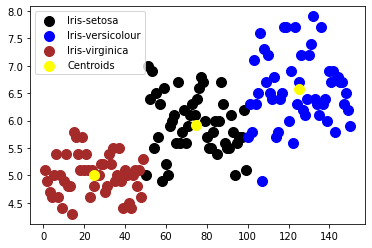

In [117]:
plt.scatter(x[r_kmeans == 0, 0], x[r_kmeans == 0, 1], 
            s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(x[r_kmeans == 1, 0], x[r_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[r_kmeans == 2, 0], x[r_kmeans == 2, 1],
            s = 100, c = 'brown', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()